# **Banking Fraud detection using Paysim Dataset**


In [ ]:
 !pip show scikit-learn

Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: fastai, imbalanced-learn, librosa, mlxtend, qudida, sklearn-pandas, yellowbrick


In [ ]:
!pip install --upgrade scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 38.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.3.1
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: fastai, imbalanced-learn, librosa, mlxtend, qudida, sklearn-pandas, yellowbrick


**Import all necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

**Mount Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Read csv file**

In [ ]:

# Path to the CSV file on your Google Drive
csv_path = '/content/drive/MyDrive/paysim dataset.csv'
# Read the CSV file into a Pandas DataFrame
data = pd.read_csv(csv_path)
df=pd.DataFrame(data)
# Display the first few rows of the DataFrame
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


**Cheak info of dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


**Cheaking the null entries**

In [ ]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

**value counts of "IsFraud" column**

In [ ]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

**value counts of "type" column**

In [ ]:
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

**count plot of "isFraud"**

Text(0.5, 1.0, '1 Fraud                         0 non-Fraud')

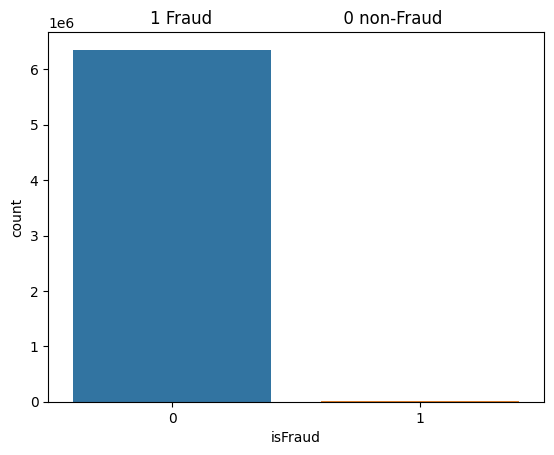

In [ ]:
sns.countplot(df,x='isFraud')
plt.title("1 Fraud                         0 non-Fraud")

**Frequencies of transaction types**

Text(0.5, 1.0, 'Frequencies of transaction types')

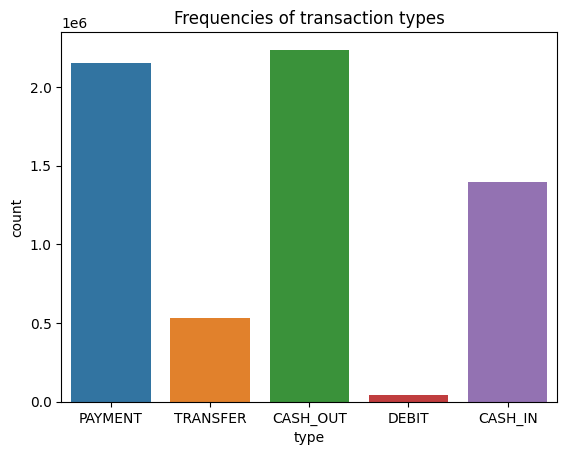

In [ ]:
sns.countplot(df,x='type')
plt.title("Frequencies of transaction types")

**Cheak the persantage of fraud in all 5 types**

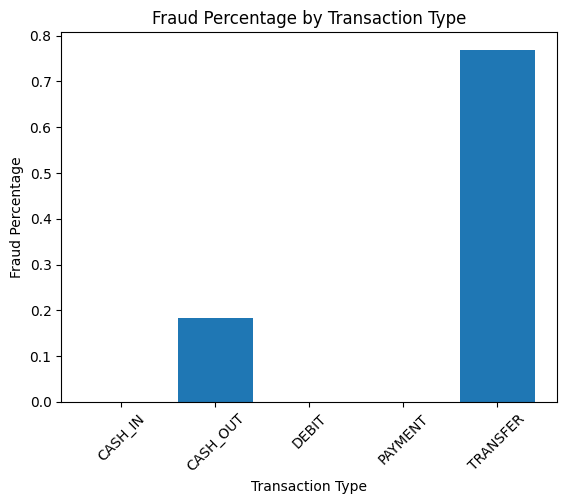

In [ ]:
# Group by "TransactionType" and calculate the mean of "isFraud"
fraud_percentage_by_type = df.groupby('type')['isFraud'].mean() * 100
# Create a bar plot
plt.bar(fraud_percentage_by_type.index, fraud_percentage_by_type.values)
# Adding labels and title
plt.xlabel('Transaction Type')
plt.ylabel('Fraud Percentage')
plt.title('Fraud Percentage by Transaction Type')

# Rotate x labels for better readability
plt.xticks(rotation=45)

# Display the plot
#plt.tight_layout()
plt.show()


**Remove all those entries in which there is no fraud**

In [ ]:

data = df.loc[df['type'].isin(['CASH_OUT', 'TRANSFER'])]
print('The new data now has ', len(data), ' transactions.')

The new data now has  2770409  transactions.


**Number of transactions where the transaction amount is negativet**

In [ ]:
print('Number of transactions where the transaction amount is negative: ' +
str(sum(data['amount'] < 0)))



Number of transactions where the transaction amount is negative: 0


**Number of transactions where the transaction amount is equal to zero**

In [ ]:
print('Number of transactions where the transaction amount is equal to zero: ' +
str(sum(data['amount'] == 0)))


Number of transactions where the transaction amount is equal to zero: 16


**Percentage of transactions where originators initial balance is 0**

Percentage of transactions where originators initial balance is 0: 47.23


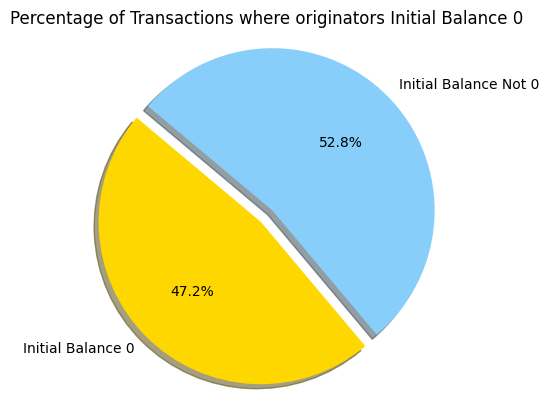

In [ ]:
no_Ofzero=sum(data['oldbalanceOrg']==0)
total=len(data['oldbalanceDest'])
percentage=(no_Ofzero/total)*100
print(f"Percentage of transactions where originators initial balance is 0: {percentage:.2f}")


labels = ['Initial Balance 0', 'Initial Balance Not 0']
sizes = [percentage, 100 - percentage]
colors = ['gold', 'lightskyblue']
explode = (0.1, 0)  # explode the 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Percentage of Transactions where originators Initial Balance 0")
plt.show()






**Percentage of transactions where  destination's final balance is 0**

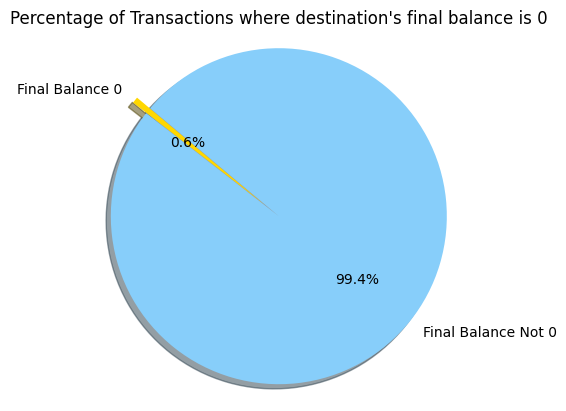

In [ ]:

no_Ofzero=sum(data['newbalanceDest']==0)
total=len(data['newbalanceDest'])
percentage=(no_Ofzero/total)*100
#print(f"Percentage of transactions where  destination's final balance is 0:{percantage:.2f}")

#pie plot
import matplotlib.pyplot as plt

# Data
labels = ['Final Balance 0', 'Final Balance Not 0']
sizes = [percentage, 100 - percentage]  # Corrected calculation
colors = ['gold', 'lightskyblue']
explode = (0.1, 0)  # Explode the first slice

# Create pie plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.title("Percentage of Transactions where destination's final balance is 0")

# Display the plot
plt.show()


**Transactions where originator balances are not accurately captured**

% transactions where originator balances are not accurately captured:93.72 


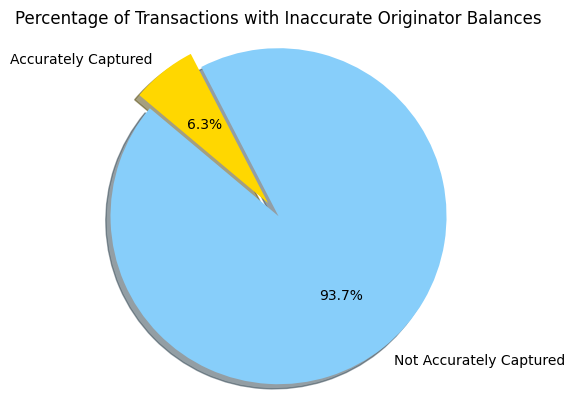

In [ ]:
tolerance = 1e-6
not_accuratly_captured=sum(np.abs(data['oldbalanceOrg']-data['amount']==data['newbalanceOrig'])<tolerance)
total=len(data['newbalanceOrig'])
percentage=(not_accuratly_captured/total)*100
print(f"% transactions where originator balances are not accurately captured:{percentage:.2f} ")


labels = [ 'Not Accurately Captured','Accurately Captured']
sizes = [percentage,100 - percentage ]
colors = ['lightskyblue', 'gold']
explode = (0, 0.1)  # Explode the "Not Accurately Captured" slice

# Create pie plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.title("Percentage of Transactions with Inaccurate Originator Balances")

# Display the plot
plt.show()

**Transactions where destination's balances are not accurately captured**

% transactions where destination's balances are not accurately captured:42.09 


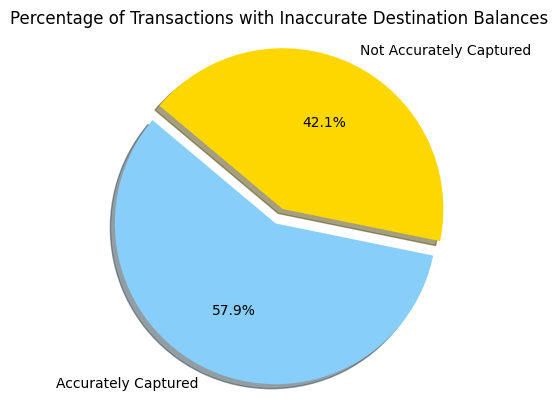

In [ ]:
tolerance = 1e-6
not_accuratly_captured=sum(np.abs(data['amount']+data['oldbalanceDest']==data['newbalanceDest'])<tolerance)
total=len(data['newbalanceDest'])
percentage=(not_accuratly_captured/total)*100
print(f"% transactions where destination's balances are not accurately captured:{percentage:.2f} ")


# Data for the pie plot
labels = ["Accurately Captured", "Not Accurately Captured"]
sizes = [100 - percentage, percentage]
colors = ['lightskyblue', 'gold']
explode = (0, 0.1)  # Explode the "Not Accurately Captured" slice

# Create pie plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.title("Percentage of Transactions with Inaccurate Destination Balances")

# Display the plot
plt.show()

**Percentage of Fraudulent Transactions where initial balance of originator is 0**

8213
41
% of fraudulent transactions where initial balance of originator is 0: 0.499209


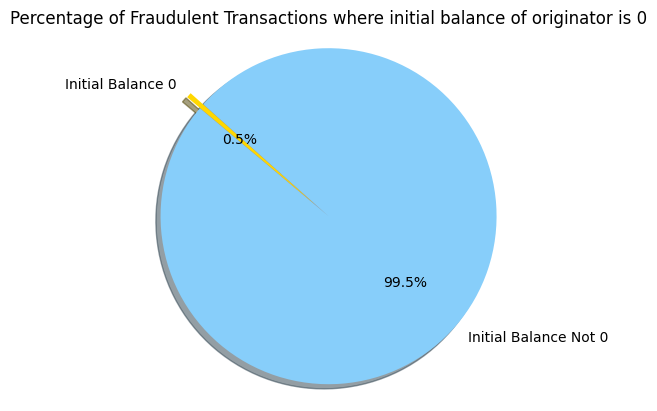

In [ ]:
#for fraudulant data

fraud_count=0
for i in range(len(data['isFraud'])):
  if data['isFraud'].values[i] ==1 :
    fraud_count=fraud_count+1
print(fraud_count)

value_count=0
for i in range(len(data['isFraud'])):
  if data['isFraud'].values[i] ==1 and data['oldbalanceOrg'].values[i]==0 :
    value_count=value_count+1
print(value_count)


percentage=(value_count/fraud_count)*100
print(f"% of fraudulent transactions where initial balance of originator is 0: {percentage:2f}")

labels = ["Initial Balance Not 0", "Initial Balance 0"]
sizes = [100 - percentage, percentage]
colors = ['lightskyblue', 'gold']
explode = (0, 0.1)  # Explode the "Initial Balance 0" slice

# Create pie plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.title("Percentage of Fraudulent Transactions where initial balance of originator is 0")

# Display the plot
plt.show()

**Percentage of Non Fraudulent Transactions where initial balance of originator is 0**

2762196
1308541
% of non fraudulent transactions where initial balance of originator is 0: 47.373213


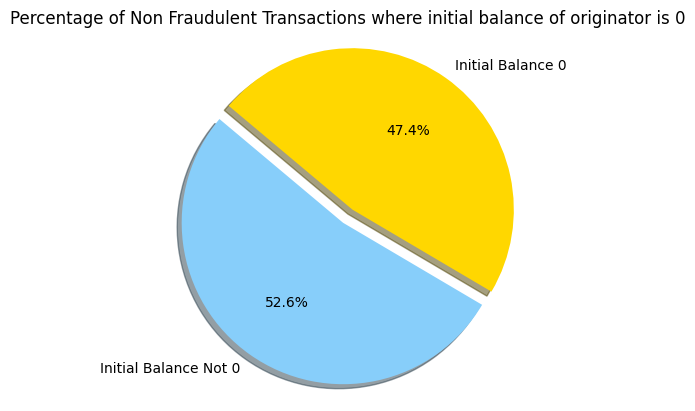

In [ ]:
#for non fraudulant data

fraud_count=0
for i in range(len(data['isFraud'])):
  if data['isFraud'].values[i] ==0 :
    fraud_count=fraud_count+1
print(fraud_count)

value_count=0
for i in range(len(data['isFraud'])):
  if data['isFraud'].values[i] ==0 and data['oldbalanceOrg'].values[i]==0 :
    value_count=value_count+1
print(value_count)


percentage=(value_count/fraud_count)*100
print(f"% of non fraudulent transactions where initial balance of originator is 0: {percentage:2f}")

labels = ["Initial Balance Not 0", "Initial Balance 0"]
sizes = [100 - percentage, percentage]
colors = ['lightskyblue', 'gold']
explode = (0, 0.1)  # Explode the "Initial Balance 0" slice

# Create pie plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.001f%%', shadow=True, startangle=140)

plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.title("Percentage of Non Fraudulent Transactions where initial balance of originator is 0")

# Display the plot
plt.show()

**Drop 'nameOrig', 'nameDest','isFlaggedFraud','step' column**

In [ ]:
data1 = data.drop(['nameOrig', 'nameDest','isFlaggedFraud','step'], axis=1)
print(data1.head())
len(data1)

        type     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
2   TRANSFER     181.00          181.0             0.0             0.0   
3   CASH_OUT     181.00          181.0             0.0         21182.0   
15  CASH_OUT  229133.94        15325.0             0.0          5083.0   
19  TRANSFER  215310.30          705.0             0.0         22425.0   
24  TRANSFER  311685.89        10835.0             0.0          6267.0   

    newbalanceDest  isFraud  
2             0.00        1  
3             0.00        1  
15        51513.44        0  
19            0.00        0  
24      2719172.89        0  


2770409

 **Test train spliting precess**

In [ ]:
from sklearn.model_selection import train_test_split
train_data,test_data=train_test_split(data1,test_size=0.3,random_state=21)
print("len of train data",len(train_data))
print("len of test data",len(test_data))

len of train data 2216327
len of test data 554082


**Separating lable column(isFraud) from train and test dataset**

In [ ]:


#training data
x_train=train_data.drop(["isFraud"],axis=1)
y_train=train_data["isFraud"]



#testing data
x_test=test_data.drop("isFraud",axis=1)
y_test=test_data["isFraud"]



print(type(y_train))

<class 'pandas.core.series.Series'>


**Pipeline designing**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder

#numerical features
num_feats=x_train.drop("type",axis=1)
num_feats_pipe=Pipeline([
    ("scalar",MinMaxScaler())
    ])
num_feats_preprocessed=num_feats_pipe.fit_transform(num_feats)

#catagorical features
cat_feats=x_train[["type"]]
cat_feats_pipe=Pipeline([
    ("encoder",OneHotEncoder())
    ])
cat_feats_preprocessed=cat_feats_pipe.fit_transform(cat_feats)
print(num_feats)


            amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
1793460  550478.89           0.00             0.0       620846.99   
2571649   31090.20           0.00             0.0      1232377.97   
6117513  189784.22           0.00             0.0       299109.37   
356744    24132.83       20179.00             0.0       992068.26   
1611385  122180.56           0.00             0.0      2272128.41   
...            ...            ...             ...             ...   
156780   777758.21      102466.00             0.0            0.00   
2573291  368448.02           0.00             0.0       605806.27   
1516393   90140.43           0.00             0.0       147255.11   
455773   575644.53      233100.02             0.0       854951.67   
4347167   68405.72           0.00             0.0        83057.26   

         newbalanceDest  
1793460      1171325.88  
2571649      1263468.17  
6117513       488893.59  
356744       1016201.09  
1611385      2394308.97  
...            

**Final pipeline**

In [ ]:

from sklearn.compose import ColumnTransformer
num_list=list(num_feats)
cat_list=list(cat_feats)

final_pipeline=ColumnTransformer([
    ("num",num_feats_pipe,num_list),
    ("cat",cat_feats_pipe,cat_list)])
X_train_preprocessed=final_pipeline.fit_transform(x_train)
print(x_train)
X_train_preprocessed

X_test_preprocessed = final_pipeline.fit_transform(x_test)
X_test_preprocessed

             type     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
1793460  TRANSFER  550478.89           0.00             0.0       620846.99   
2571649  CASH_OUT   31090.20           0.00             0.0      1232377.97   
6117513  CASH_OUT  189784.22           0.00             0.0       299109.37   
356744   CASH_OUT   24132.83       20179.00             0.0       992068.26   
1611385  CASH_OUT  122180.56           0.00             0.0      2272128.41   
...           ...        ...            ...             ...             ...   
156780   TRANSFER  777758.21      102466.00             0.0            0.00   
2573291  CASH_OUT  368448.02           0.00             0.0       605806.27   
1516393  CASH_OUT   90140.43           0.00             0.0       147255.11   
455773   TRANSFER  575644.53      233100.02             0.0       854951.67   
4347167  CASH_OUT   68405.72           0.00             0.0        83057.26   

         newbalanceDest  
1793460      1171325.88  

array([[3.36382277e-03, 5.04691166e-04, 0.00000000e+00, ...,
        1.58313963e-02, 1.00000000e+00, 0.00000000e+00],
       [2.78965548e-04, 2.16186564e-04, 0.00000000e+00, ...,
        6.17391166e-05, 1.00000000e+00, 0.00000000e+00],
       [7.93720827e-04, 0.00000000e+00, 0.00000000e+00, ...,
        1.02358160e-03, 1.00000000e+00, 0.00000000e+00],
       ...,
       [2.59921586e-03, 0.00000000e+00, 0.00000000e+00, ...,
        1.41335894e-02, 1.00000000e+00, 0.00000000e+00],
       [3.46092308e-03, 2.32473114e-04, 0.00000000e+00, ...,
        1.37943882e-03, 1.00000000e+00, 0.00000000e+00],
       [5.94865456e-04, 7.73311307e-04, 0.00000000e+00, ...,
        1.26411809e-03, 1.00000000e+00, 0.00000000e+00]])

# Ml models

# **logistic regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
log_model=model.fit(X_train_preprocessed,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
y_train_pred = log_model.predict(X_train_preprocessed)
y_train_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_test_pred=log_model.predict(X_test_preprocessed)
y_test_pred

array([0, 0, 0, ..., 0, 0, 0])

**Train Confusion Matrix**

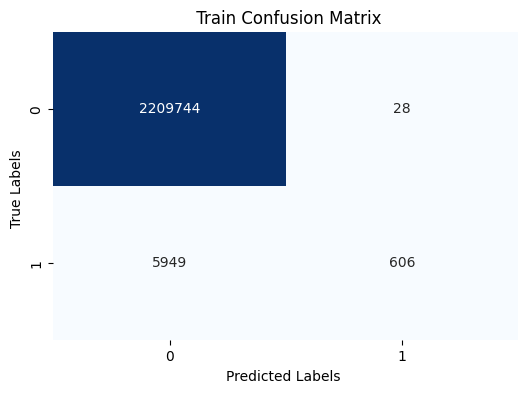

In [ ]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_train, y_train_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels ")
plt.ylabel("True Labels ")
plt.title(" Train Confusion Matrix")
plt.show()


**Test Confusion Matrix**

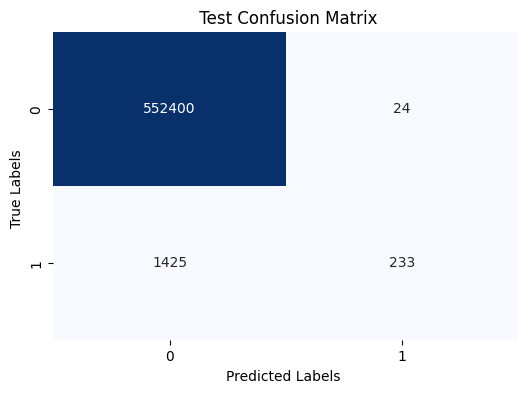

In [ ]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels ")
plt.ylabel("True Labels ")
plt.title(" Test Confusion Matrix")
plt.show()


**F1 score of train and test**

In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(y_train,y_train_pred)
print("F1 Score of train data:", f1)

f2 = f1_score(y_test,y_test_pred)
print("F1 Score of test data:", f2)

F1 Score of train data: 0.16859090276811797
F1 Score of test data: 0.24334203655352485


# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=21)

# Train the model on your training data
rf_model.fit(X_train_preprocessed,y_train)

# Make predictions on your testing data
y_test_pred_rf = rf_model.predict(X_test_preprocessed)



In [ ]:
# Make predictions on your training data
y_train_pred_rf = rf_model.predict(X_train_preprocessed)
y_train_pred_rf
y_test_pred_rf

array([0, 0, 0, ..., 0, 0, 0])

**F1 score of train and test**

In [ ]:
from sklearn.metrics import f1_score
f1 = f1_score(y_train,y_train_pred_rf)
print("F1 Score of train data:", f1)

f2 = f1_score(y_test,y_test_pred_rf)
print("F1 Score of test data:", f2)

F1 Score of train data: 0.9273441335297005
F1 Score of test data: 0.7683876550331699


In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_test_pred_rf)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552424
           1       0.74      0.80      0.77      1658

    accuracy                           1.00    554082
   macro avg       0.87      0.90      0.88    554082
weighted avg       1.00      1.00      1.00    554082



**Train Confusion Matrix**

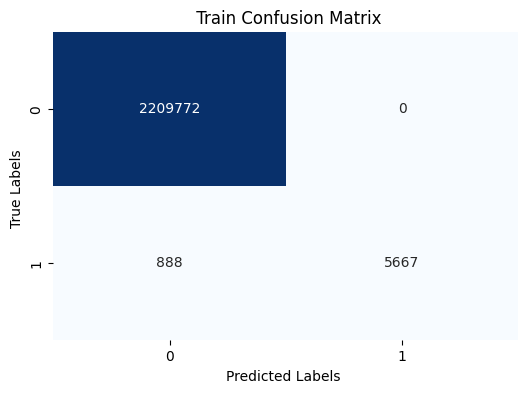

In [ ]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_train, y_train_pred_rf)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels ")
plt.ylabel("True Labels ")
plt.title(" Train Confusion Matrix")
plt.show()


**Test Confusion Matrix**

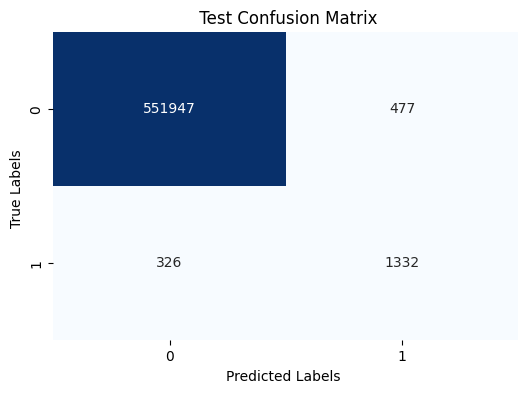

In [ ]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_test_pred_rf)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels ")
plt.ylabel("True Labels ")
plt.title(" Test Confusion Matrix")
plt.show()


# **xgboost**

In [ ]:
# import xgboost as xgb

# # Create an XGBoost classifier
# xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)

# # Train the model on your training data
# xgb_model.fit(X_train_preprocessed,y_train)

# # Make predictions on your testing data
# y_test_pred_xgb = xgb_model.predict(X_test_preprocessed)


In [ ]:
# # Make predictions on your training data
# y_train_pred_xgb = rf_model.predict(X_train_preprocessed)
# y_train_pred_xgb
# y_test_pred_xgb

array([0, 0, 0, ..., 0, 0, 0])

**F1 score of train and test**

In [ ]:
# f1 = f1_score(y_train,y_train_pred_xgb)
# print("F1 Score of train data:", f1)

# f2 = f1_score(y_test,y_test_pred_xgb)
# print("F1 Score of test data:", f2)

F1 Score of train data: 0.9273441335297005
F1 Score of test data: 0.5287018917155902


**Train Confusion Matrix**

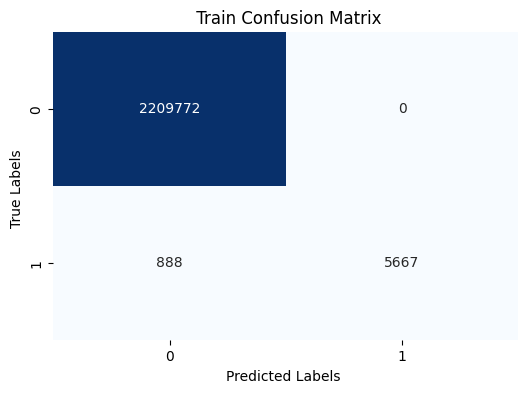

In [ ]:
# from sklearn.metrics import confusion_matrix

# # Compute the confusion matrix
# cm = confusion_matrix(y_train, y_train_pred_xgb)

# # Create a heatmap to visualize the confusion matrix
# plt.figure(figsize=(6, 4))
# sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
# plt.xlabel("Predicted Labels ")
# plt.ylabel("True Labels ")
# plt.title(" Train Confusion Matrix")
# plt.show()


**Test Confusion Matrix**

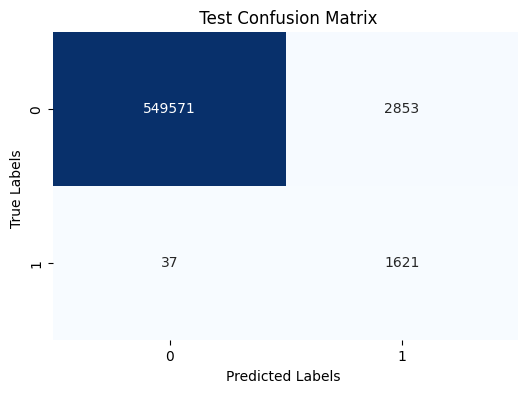

In [ ]:
# from sklearn.metrics import confusion_matrix

# # Compute the confusion matrix
# cm = confusion_matrix(y_test, y_test_pred_xgb)

# # Create a heatmap to visualize the confusion matrix
# plt.figure(figsize=(6, 4))
# sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
# plt.xlabel("Predicted Labels ")
# plt.ylabel("True Labels ")
# plt.title(" Test Confusion Matrix")
# plt.show()


# svm

In [ ]:
from sklearn.svm import SVC

# Create an SVM classifier with an RBF kernel
svm_classifier = SVC(kernel='rbf', C=1.0)

# Train the SVM model
svm_classifier.fit(X_train_preprocessed, y_train)


In [ ]:
y_train_pred_svm=svm_classifier.predict(X_train_preprocessed)
y_test_pred_svm=svm_classifier.predict(X_train_preprocessed)

**f1 score of test and train**

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

f1=f1_score(y_train,y_train_pred_svm)
print("f1 score of train is ",f1)
f2=f1_score(y_test,y_test_pred_svm)
print(("f1 score of test is ",f2))


**Train confusion matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_train,y_train_pred_svm)

# Create a heatmap to visualize the confusion matrix

plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True labels")
plt.title(" Train Confusion Matrix")
plt.show()

**Test confusion matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_test_pred_svm)

# Create a heatmap to visualize the confusion matrix

plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True labels")
plt.title(" Test Confusion Matrix")
plt.show()

In [ ]:
# from joblib import dump, load

# # Save your model to a file
# joblib.dump(rf_model, 'banking_app_rf.joblib')


In [ ]:
# loaded_model=load("banking_app_rf.joblib")

In [ ]:
#pre=loaded_model.predict(X_train_preprocessed)

In [ ]:
# import joblib
# # Save your model to a file
# joblib.dump('xgb_model', 'banking_application_xgb.pkl')


In [ ]:
# import joblib
# # Save your model to a file
# joblib.dump('lgb_model', 'banking_application_lgb.pkl')


In [ ]:
# pickle.dump(model, open('xgb_model.pkl', 'wb'))